In [2]:
library(DescTools)
library(ggplot2)
library(readr)
suppressWarnings(library(dplyr))
library(visNetwork)

In [3]:
data <- read_csv('OAXreverse(manjka).csv')
#data$value <- data$value / 10**18
data$UnixTimestamp <- as.POSIXct(data$UnixTimestamp,origin="1970-01-01",tz="GMT")
#data <- data[data$value > 0,] #odstranim transakcije, kjer je value 0
head(data)

Parsed with column specification:
cols(
  Txhash = col_character(),
  Blockno = col_integer(),
  UnixTimestamp = col_integer(),
  DateTime = col_character(),
  From = col_character(),
  To = col_character(),
  Quantity = col_double()
)


Txhash,Blockno,UnixTimestamp,DateTime,From,To,Quantity
0xfdb6c1df82f588441b4b64cd47e917f792434bb338580b8dab0e18689588c094,3971323,2017-07-04 05:00:33,7/4/2017 5:00:33 AM,0x0000000000000000000000000000000000000000,0x2ae528536128a9b0eb697ea8ce385b76de02e182,157.9644
0x9a1a846a4bc862cd3e03b55122c212def7a9f9f7cb6b26a4ce9f8ec091e34088,3971318,2017-07-04 04:59:13,7/4/2017 4:59:13 AM,0x0000000000000000000000000000000000000000,0x62d1a48c06dae03ffd3dadea33f98b9aacca5c35,478.6800
0x2fc7aa09c1a42ba77fd6ff6bd4dfc03b9b7d9eb060031bfd1f78c1941fe33376,3971315,2017-07-04 04:58:40,7/4/2017 4:58:40 AM,0x0000000000000000000000000000000000000000,0x22b38133840d03b750420c7a91675565f964c3bc,190.8389
0xa38d81a305bd681c15959f83d471f5d426dad06438f4f5af8a56c7862bb05140,3971313,2017-07-04 04:58:20,7/4/2017 4:58:20 AM,0x0000000000000000000000000000000000000000,0x8753773a0796335b8d078d3dd7deef4262e0439f,287.2080
0xa7a89b55d39595b27399f65786fc64734c38793622b7806ecfce1c470e588844,3971313,2017-07-04 04:58:20,7/4/2017 4:58:20 AM,0x0000000000000000000000000000000000000000,0xd213f47b373c4a0f79f79584e5c1b6385e5ab308,239.3400
0x6f2135887209fb9db7e99bdfbde48b949843914b6d8d0d5b3606cbce0f953836,3971313,2017-07-04 04:58:20,7/4/2017 4:58:20 AM,0x0000000000000000000000000000000000000000,0xeb9579e553a465d74a59a9e6059b552ee86df200,957.3600


In [4]:
tmp <- data[data$To == '0x701c244b988a513c945973defa05de933b23fe1d',]
nrow(tmp)

[1] 0

In [5]:
sum(data$Quantity)

[1] 3950219

### Zgoraj je samo poskus analize z druge strani. Glej spodnji link

https://etherscan.io/token/0x701c244b988a513c945973defa05de933b23fe1d?a=0x0000000000000000000000000000000000000000

In [3]:
data <- read_csv('OAX.csv')
data$value <- data$value / 10**18
data$timeStamp <- as.POSIXct(data$timeStamp,origin="1970-01-01",tz="GMT")
data <- data[data$value > 0,] #odstranim transakcije, kjer je value 0
head(data)

Parsed with column specification:
cols(
  blockNumber = col_integer(),
  timeStamp = col_integer(),
  from = col_character(),
  to = col_character(),
  value = col_double()
)


blockNumber,timeStamp,from,to,value
3913144,2017-06-22 13:00:26,0x8a53ee33d77371bacdc76cae6632c23495f669d7,0x701c244b988a513c945973defa05de933b23fe1d,1.0000000
3913144,2017-06-22 13:00:26,0xa6bc6b41fc360364af6c2138ad9f1e4005523532,0x701c244b988a513c945973defa05de933b23fe1d,2.0000000
3913144,2017-06-22 13:00:26,0x3b150851de69e672ec79a60a3df4663985496e14,0x701c244b988a513c945973defa05de933b23fe1d,1.0000000
3913145,2017-06-22 13:00:30,0x6732f7bec0e6ce62f7edfcd7448cfb2947e6526b,0x701c244b988a513c945973defa05de933b23fe1d,0.9898319
3913146,2017-06-22 13:00:37,0x03474b39c921adbfaa80aad93a3069b5cd2f7958,0x701c244b988a513c945973defa05de933b23fe1d,0.9500000
3913146,2017-06-22 13:00:37,0x9db5b9e37d8e8827f5f49839821cb16db555d5f6,0x701c244b988a513c945973defa05de933b23fe1d,2.1000000


In [7]:
n <- dim(data)[1]
data <- data[1:(n-3),]
n

[1] 5097

In [8]:
tail(data)

blockNumber,timeStamp,from,to,value
3973606,2017-07-04 15:51:07,0x957586da2f235bb062dcdae2b4fb17c4d29f111b,0x701c244b988a513c945973defa05de933b23fe1d,0.07219663
3973909,2017-07-04 17:18:06,0x957586da2f235bb062dcdae2b4fb17c4d29f111b,0x701c244b988a513c945973defa05de933b23fe1d,0.06619663
3973937,2017-07-04 17:24:19,0x957586da2f235bb062dcdae2b4fb17c4d29f111b,0x701c244b988a513c945973defa05de933b23fe1d,0.06367663
3973996,2017-07-04 17:37:54,0x957586da2f235bb062dcdae2b4fb17c4d29f111b,0x701c244b988a513c945973defa05de933b23fe1d,0.05100000
3977586,2017-07-05 11:01:24,0x957586da2f235bb062dcdae2b4fb17c4d29f111b,0x701c244b988a513c945973defa05de933b23fe1d,0.03900000
3977711,2017-07-05 11:37:38,0x957586da2f235bb062dcdae2b4fb17c4d29f111b,0x701c244b988a513c945973defa05de933b23fe1d,0.02700000


In [9]:
sum(data$value)

[1] 27447.5

https://medium.com/@OAX_Foundation/the-openanx-token-sale-has-officially-closed-41a473512d0f

https://medium.com/@OAX_Foundation

In [36]:
mean(data$value)

[1] 5.388203

In [22]:
length(unique(data$from))

[1] 3739

In [23]:
tmp <- split(data, cut(strptime(data$timeStamp, format="%F %R"),"day"))
length(tmp)

[1] 14

In [25]:
tmp <- split(data, cut(strptime(data$timeStamp, format="%F %R"),"day"))
df <- data.frame(Date=as.Date(as.character()), sum=numeric(),count=numeric(), stringsAsFactors=FALSE)
for (i in c(1:14)) {
    day <- tmp[[i]]
    vec <- c(day$timeStamp[[1]], sum(day$value),length(day$value))
    df <- rbind(df, vec)
    }
colnames(df)<- c("date", "sum", "count")
df$date <- as.POSIXct(df$date,origin="1970-01-01",tz="GMT")
df$date <- as.Date(df$date)
df$total <- cumsum(df$sum)
df

date,sum,count,total
2017-06-22,16405.0637,2339,16405.06
2017-06-23,3307.0482,785,19712.11
2017-06-24,1090.1163,297,20802.23
2017-06-25,1443.4902,308,22245.72
2017-06-26,755.1073,226,23000.83
2017-06-27,534.7403,165,23535.57
2017-06-28,217.9107,98,23753.48
2017-06-29,230.3146,108,23983.79
2017-06-30,233.9607,148,24217.75
2017-07-01,241.4004,75,24459.15


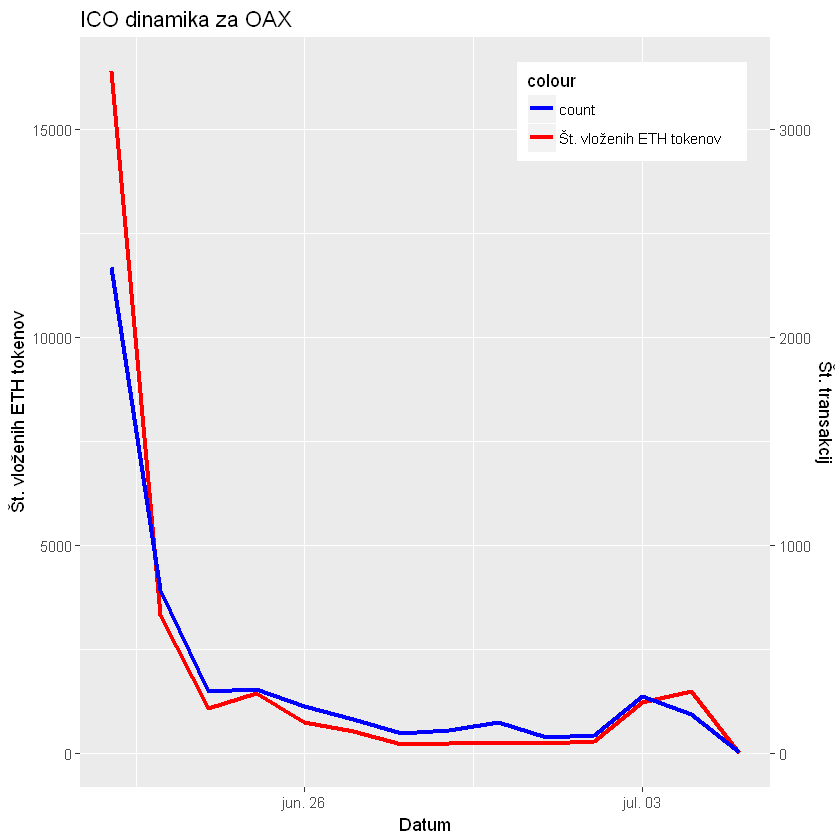

In [26]:
p <- ggplot(df, aes(x = date)) + geom_line(aes(y = sum, colour = "Št. vloženih ETH tokenov"),size=1.2) + 
    geom_line(aes(y = count*5, colour = "count"), size=1.2) + 
    scale_y_continuous(sec.axis = sec_axis(~./5, name = "Št. transakcij")) + 
    scale_colour_manual(values = c("blue", "red")) + labs(y = "Št. vloženih ETH tokenov", x = "Datum") + 
    theme(legend.position = c(0.8, 0.9)) + ggtitle('ICO dinamika za OAX ')
p

In [56]:
data['class'] <- data['value'] %/% 0.3
data['class'] <- data['class'] / (10/3)
vecina <- data[data$value <= 2, ]
other <- nrow(data[data$value > 2, ])
vecina$class <- as.character(vecina$class)
velikost <- vecina %>% select(value, class) %>% group_by(class) %>% summarise(st_transakcij = length(value), 
                                                                              sum = round(sum(value),1))
velikost$class <- as.numeric(velikost$class)
velikost$bucket <- rep(0, nrow(velikost))
for (i in c(1:nrow(velikost))) {
    tmp <- paste(velikost$class[[i]],'-',velikost$class[[i]]+0.3,sep=' ')
    velikost$bucket[[i]] <- tmp
}
velikost$delez_v_procentih <-round((velikost$st_transakcij / 5097)*100,1)
velikost$sum_v_procentih <-round((velikost$sum / 27447)*100,1)
#tele spodnje tri vrstice zakomentiraj, če želiš 'pognati' graf
velikost$class <- NULL
velikost <- velikost[,c('bucket', 'st_transakcij', 'delez_v_procentih', 'sum', 'sum_v_procentih')]
velikost

#spodnji dve vrstici dodajam samo za potrebe pie charta

#prva<-data.frame("2.1-10",0,21.9)
#names(prva)<-c('bucket', 'st_transakcij', 'delez_v_procentih')
#druga<-data.frame("10-1000",0,10.9)
#names(druga)<-c('bucket', 'st_transakcij', 'delez_v_procentih')

#velikost <- rbind(velikost, prva)
#velikost <- rbind(velikost, druga)
#velikost

bucket,st_transakcij,delez_v_procentih,sum,sum_v_procentih
0 - 0.3,979,19.2,114.1,0.4
0.3 - 0.6,657,12.9,287.3,1.0
0.6 - 0.9,152,3.0,111.0,0.4
0.9 - 1.2,939,18.4,942.6,3.4
1.2 - 1.5,102,2.0,132.4,0.5
1.5 - 1.8,135,2.6,211.2,0.8
1.8 - 2.1,464,9.1,920.9,3.4


In [57]:
sum(velikost$sum_v_procentih)

[1] 9.9

In [40]:
bp<- ggplot(velikost, aes(x="", y=delez_v_procentih, fill=bucket))+ geom_bar(width = 1, stat = "identity")


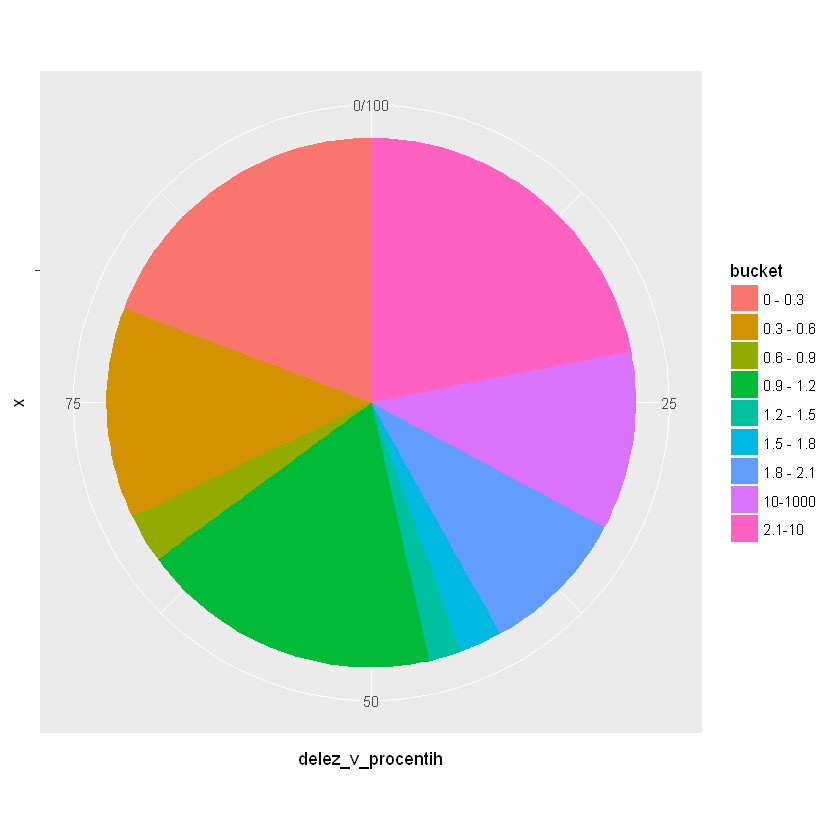

In [45]:
pie <- bp + coord_polar("y", start=0) 
pie

In [16]:
other

[1] 1669

In [68]:
data['class'] <- data['value'] %/% 10
data['class'] <- data['class'] * 10
ostali <- data[data$value > 2, ]
ostali$class <- as.character(ostali$class)
velikost <- ostali %>% select(value, class) %>% group_by(class) %>% summarise(st_transakcij = length(value), 
                                                                              sum = round(sum(value),1))
velikost$class <- as.numeric(velikost$class)
velikost$bucket <- rep(0, nrow(velikost))
for (i in c(1:nrow(velikost))) {
    tmp <- paste(velikost$class[[i]],'-',velikost$class[[i]]+10,sep=' ')
    velikost$bucket[[i]] <- tmp
}
velikost <- velikost[with(velikost, order(class)), ]
velikost$bucket[[1]] <- ('2.1 - 10')
velikost$delez_v_procentih <-round((velikost$st_transakcij / 5097)*100,1)
velikost$sum_v_procentih <-round((velikost$sum / 27447)*100,1)
velikost$class <- NULL
velikost <- velikost[,c('bucket', 'st_transakcij', 'delez_v_procentih', 'sum', 'sum_v_procentih')]
velikost

bucket,st_transakcij,delez_v_procentih,sum,sum_v_procentih
2.1 - 10,1117,21.9,4979.6,18.1
10 - 20,292,5.7,3584.7,13.1
20 - 30,106,2.1,2332.6,8.5
30 - 40,47,0.9,1490.6,5.4
40 - 50,29,0.6,1243.1,4.5
50 - 60,23,0.5,1184.6,4.3
60 - 70,9,0.2,568.0,2.1
70 - 80,4,0.1,293.0,1.1
80 - 90,3,0.1,240.0,0.9
90 - 100,2,0.0,189.0,0.7


In [76]:
kaj <- read.csv('size.csv', sep = ";")
kaj

Bucket,Nr.txs,Nr.txs..,Value..ETH.,Value..ETH...
0 - 0.3,979,19.2,114.1,0.4
0.3 - 0.9,809,15.9,398.3,1.4
0.9 - 1.2,939,18.4,942.6,3.4
1.2 - 1.8,237,4.6,343.6,1.3
1.8 - 2.1,464,9.1,920.9,3.4
2.1 - 10,1117,21.9,4979.6,18.1
10-100,515,10.2,11125.6,40.6
100-1000,37,0.4,8623.3,31.3


In [81]:
sum(kaj$Value..ETH...)

[1] 99.9

In [74]:
#tmp <- head(velikost, n = 10)
#tmp <- tail(tmp, n = 9)
sum(tmp$st_transakcij)
#tmp

[1] 515

In [22]:
whales <- data[with(data, order(-value)), ]
whales <- whales[, c('timeStamp', 'from', 'value')]
tmp <- head(whales, n=40)

In [24]:
tmp <- tmp[tmp$value >= 100, ]
tmp

timeStamp,from,value
2017-06-22 13:02:01,0x49a408f1ee8951c509db64be3cd47a0faf81d2a6,1000.0000
2017-06-22 13:02:41,0x0342d1a7e22baa5410ee8c72873e7a67c7b20c77,700.0000
2017-06-22 20:44:59,0x75c8e2dd57927eb0373e8e201ebf582406adcf45,600.0000
2017-06-23 06:00:46,0x09b8b644fbfc6ee8e5dd0f450a030e5f381a5cfa,498.9889
2017-06-22 13:57:20,0xb7f1498898d70685851b5331f64bf26215f00415,490.0000
2017-06-22 13:06:01,0x88e4c34f2d290d32761bcd68e874e018d3355d4a,423.0000
2017-06-22 13:00:50,0x7b5e7fa8e19db6f3488d064c5f0ae519f439a643,400.0000
2017-06-22 13:14:27,0x7b5e7fa8e19db6f3488d064c5f0ae519f439a643,400.0000
2017-07-03 02:37:56,0xa93e901c15586a2477cc50df0fe6f9f5091301a3,360.0000
2017-06-23 16:29:37,0x3eebfc3a6a03b4114013be679cfe36099dfad29b,300.0000


In [25]:
length(unique(tmp$from))

[1] 32

In [26]:
nrow(tmp)

[1] 37

In [27]:
tmp[tmp$from == '0x3bcd2d9c796c0d5d0e26918d78b81366fd284861',]

timeStamp,from,value
2017-06-22 13:03:28,0x3bcd2d9c796c0d5d0e26918d78b81366fd284861,203.8811
2017-06-22 15:34:53,0x3bcd2d9c796c0d5d0e26918d78b81366fd284861,103.7654
2017-06-22 15:31:14,0x3bcd2d9c796c0d5d0e26918d78b81366fd284861,100.0000
2017-06-22 15:33:05,0x3bcd2d9c796c0d5d0e26918d78b81366fd284861,100.0000
2017-06-22 15:33:54,0x3bcd2d9c796c0d5d0e26918d78b81366fd284861,100.0000


In [3]:
whales <- data[, c('timeStamp', 'from', 'value')]
df <- data.frame(Characters=character(), Doubles=double(), stringsAsFactors=FALSE)
#for (investor in unique(tmp$from)) {
#    tmp <- whales[whales$from == investor,]
#    vec <- c(investor, sum(tmp$value))
#    df <- rbind(df, vec)
#}

#nrow(df)

In [5]:
nrow(whales)

[1] 5097

In [6]:
df <- whales %>% select(from, value) %>% 
                        group_by(from) %>% summarise(total = sum(value))
nrow(df)

[1] 3740

In [7]:
head(df)

from,total
0x000103d7eb8c5a5c86939c4affedcbaf4ad3bcb3,22.0000000
0x00020d45fc6f23a2d25c794fdc5af1a1fba151a4,1.5000000
0x0002a00e5986753208924f77683763bb3834f91e,0.9981013
0x000b9f4c726ff1785f9d7ec7496f068de58ecdc3,0.9800000
0x000cdbd6271d0a2c953a9539905289e95583b7a5,2.0000000
0x001016042aac422306b3c974cd5f70e627d82072,10.0000000


In [13]:
df <- df[with(df, order(-total)), ]
head(df, n=50)

from,total
0x49a408f1ee8951c509db64be3cd47a0faf81d2a6,1000.0000
0x7b5e7fa8e19db6f3488d064c5f0ae519f439a643,800.0000
0x0342d1a7e22baa5410ee8c72873e7a67c7b20c77,700.0000
0x3bcd2d9c796c0d5d0e26918d78b81366fd284861,607.6465
0x75c8e2dd57927eb0373e8e201ebf582406adcf45,600.0000
0x09b8b644fbfc6ee8e5dd0f450a030e5f381a5cfa,513.9629
0xb7f1498898d70685851b5331f64bf26215f00415,490.0000
0x88e4c34f2d290d32761bcd68e874e018d3355d4a,423.0000
0xa93e901c15586a2477cc50df0fe6f9f5091301a3,360.0000
0x3eebfc3a6a03b4114013be679cfe36099dfad29b,300.0000
